# Random Forest Regression

## What is Random Forest Regression?

Random Forest is a supervised learning algorithm. It can be used both for classification and regression. It is a tree-based algorithm. It is a part of ensemble learning. Ensemble learning is a process in which multiple models are used to solve a particular problem.

### Why Random Forest?

* They can handle complex and nonlinear relationships between features and target variables.

* They can handle high-dimensional data with many features, which is common in many real-world applications.

* They can handle missing or incomplete data, which is also common in many real-world applications.

* They can provide insights into the importance of different features in the data.

* They can be used for both regression and classification tasks.

* They are easy to implement and use, as they require minimal hyperparameter tuning and can be trained quickly.

* They are robust to overfitting, which is a common problem in machine learning.

*Overall, decision forest models are a popular choice for many machine learning tasks because they are powerful, versatile, and easy to use. They can provide valuable insights and predictions in a wide range of applications, from stock market analysis to medical diagnosis.*

### Importing libraries

We will be using the following libraries:

*   `pandas` for data manipulation
*   `numpy` for numerical operations
*   `matplotlib` for plotting
*   `seaborn` for plotting
*   `datetime` for date manipulation(not used though)
*   `sklearn` for applying machine learning algorithms
*   'ensemble' from sklearn for Random Forest

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn 
from sklearn.ensemble import RandomForestRegressor

### Importing the dataset

We will be using [this](https://www.kaggle.com/rohanrao/nifty50-stock-market-data) dataset.

The folder is categorized into 52 csv files, each containing the data of a particular stock. We will be using the data of *DRREDDY* stock. We can use any other stock as well. Just need to change this : `dataset_orig = pd.read_csv("/home/kalyan/DataSets/NIFT-50-Stock/DRREDDY.csv")`

* This specific csv file contains 5306 rows and 15 columns. *(i.e 5306 days of data and 15 features)*

In [20]:
# Importing the dataset
dataset_orig = pd.read_csv("/home/kalyan/DataSets/NIFT-50-Stock/DRREDDY.csv")
dataset_orig.head(400)
print(dataset_orig.shape)


(5306, 15)


### Plotting the data

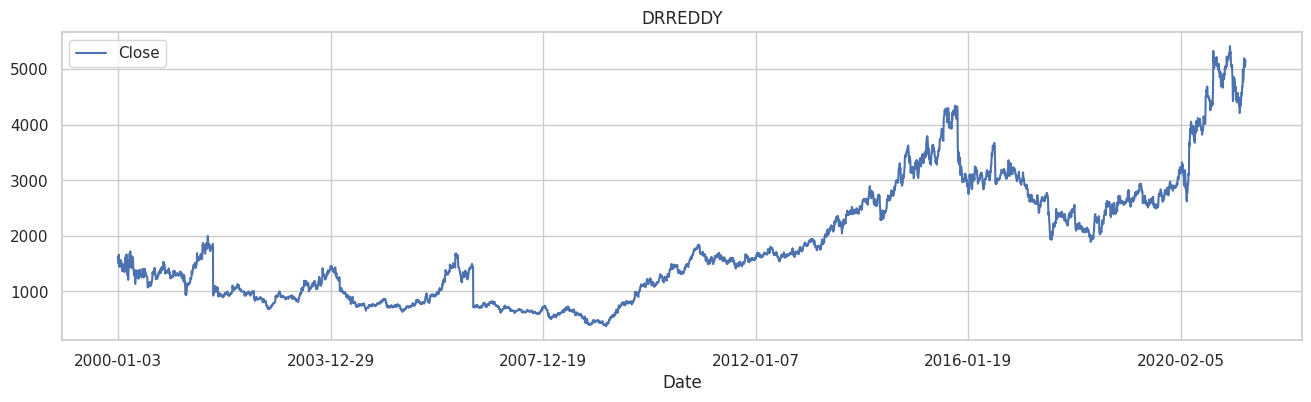

In [21]:
plot = dataset_orig.plot(x='Date', y='Close',  figsize=(16,4), title='DRREDDY')


* First we copy *Close* from the original dataset to a new variable
* Making new dataset variable with only Target and Actual Close

In [22]:
# Ensure we know the actual closing price
data = dataset_orig[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = dataset_orig.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

data.head(4)

/tmp/ipykernel_11190/3004087540.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Series', 'Symbol'], dtype='object')
  data["Target"] = dataset_orig.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]


,Actual_Close,Target
0,1508.25,NaN
1,1628.95,1.0
2,1568.05,0.0
3,1661.55,1.0


* We now shift the Close column by 1 day. This is done to make the prediction for the next day. We will be using the data of the previous day to predict the data of the next day.
* We Store it in a new variable called *data_prev*

In [23]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
data_prev = dataset_orig.copy()
data_prev = data_prev.shift(1)

* Now we make a predictor list with features from Original Dataset and then joining it to data variable (the final train set)

In [24]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(dataset_orig[predictors]).iloc[1:]

In [25]:
data

,Actual_Close,Target,Close,Volume,Open,High,Low
1,1628.95,1.0,1628.95,57142,1590.00,1628.95,1510.00
2,1568.05,0.0,1568.05,119697,1549.00,1650.00,1499.00
3,1661.55,1.0,1661.55,121966,1599.00,1693.50,1571.00
4,1529.10,0.0,1529.10,79641,1685.00,1685.00,1528.65
5,1503.90,0.0,1503.90,62612,1560.00,1560.00,1407.50
...,...,...,...,...,...,...,...
5301,5066.70,0.0,5066.70,950577,5125.00,5130.00,5030.25
5302,5057.25,0.0,5057.25,957835,5090.50,5116.00,5021.35
5303,5044.45,0.0,5044.45,843953,5082.55,5106.90,5030.00
5304,5102.30,1.0,5102.30,1071931,5070.25,5144.00,5042.30


* Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.


In [26]:
model = RandomForestRegressor(n_estimators=100, min_samples_split=200, random_state=1)

In [27]:
# Create a train and test set
train = data.iloc[:-1000]
test = data.iloc[-1000:]

model.fit(train[predictors], train["Target"])

RandomForestRegressor(min_samples_split=200, random_state=1)

* We use mean_squared_error to calculate the error between the predicted and actual values as we are using regression.

* We use r2_score to calculate the accuracy of the model.

Mean Absolute Error:  0.4841449694383532
Root Mean Squared Error:  0.48901844407833023


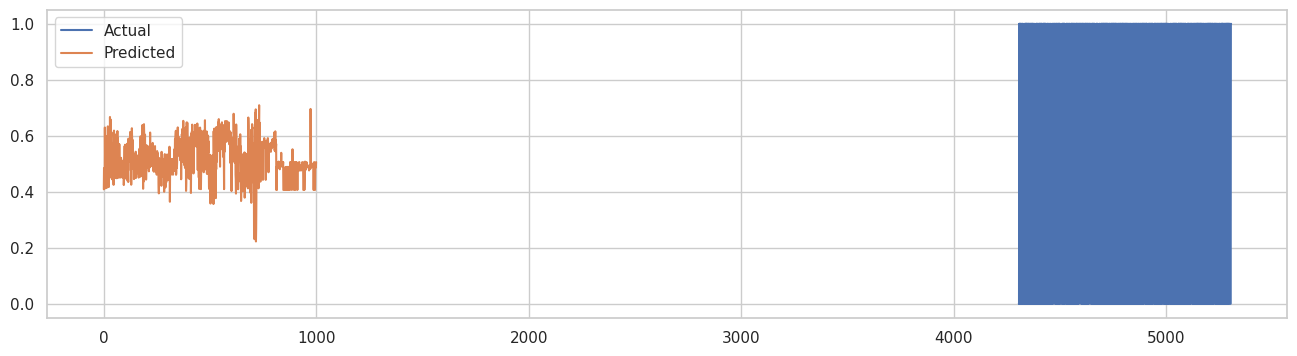

In [28]:
from sklearn import metrics

y_pred = model.predict(test[predictors])

mae = metrics.mean_absolute_error(test["Target"], y_pred)
rmse = np.sqrt(metrics.mean_squared_error(test["Target"], y_pred))
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

# Plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test["Target"], label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()



In [29]:
"""from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)"""

'from sklearn.metrics import precision_score\n\n# Evaluate error of predictions\npreds = model.predict(test[predictors])\npreds = pd.Series(preds, index=test.index)\nprecision_score(test["Target"], preds)'

In [30]:
"""combined = pd.concat({"Target": test["Target"],"Predictions": mae}, axis=1)
combined.plot()"""

'combined = pd.concat({"Target": test["Target"],"Predictions": mae}, axis=1)\ncombined.plot()'

* i represents the number of days we want to predict. We can change it to any number. Here we are predicting the next 1000 days.
* We use every 10 days to predict the next day. We can change it to any number. Here we are using every 10 days to predict the next day. The step size

### Making a function to predict the next 1000 days with a step size of 10

*First we make a predictions array
* We put all the logic into the for loop as we can make many iterations of the loop to predict the next 1000 days with a step size of 10
* The train and test sets are created by splitting the data frame at the current index position.
* We fit the model on the train set and predict the next day.
* The predictions are converted to a Series object to match the test set index by using ```preds = pd.Series(preds, index=test.index)```
* Predictions are converted to 0 and 1 based on the threshold value using 

    ```preds[preds > .47] = 1 ```

    ```preds[preds<=.47] = 0 ```
* We then combine the predictions with the test set to see the actual and predicted values.
* The predictions are appended to the predictions array.


In [31]:
def backtest(data, model, predictors, start=1000, step=10):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        preds[preds > .47] = 1
        preds[preds<=.47] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

### With few parameters for backtest

In [32]:
predictions = backtest(data, model, predictors)
predictions["Predictions"].value_counts()


1.0    3080
0.0    1225
Name: Predictions, dtype: int64

In [34]:
from sklearn.metrics import precision_score
precision_score(predictions["Target"], predictions["Predictions"])

0.5896103896103896

### We now add mean of "Close" from 7 days as a column to the dataset

* ```data.rolling(x)```  rolling command is used to take a specific x and will be doing math calculations on it

In [35]:
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

* ```data.shift(x)```  shift command is used to shift the data by x days

In [36]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

* We do the weekly , monthly and yearly mean of the data and add it as a column to the dataset 

In [37]:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

data["weekly_trend"] = weekly_trend


* In this snippet we are adding the mean of the data from 7 days as a column to the dataset

In [38]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

* Now we combine all the new features as columns as predictors .
* We can improve the model by adding other usefull features.

In [39]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]

* The first 365 data has NaN data (i.e) 365 days of data is missing. So we drop them.

* In this snippet we are finding ration of Open and close of the same day , narrowing down the data to find the change in  each day

In [40]:
#adding intra day data to predictors 
data["intraday_mean"] = data["Close"] / data["Open"]
data["intraday_high"] = data["High"] / data["Open"]
data["intraday_low"] = data["Low"] / data["Open"]

#remove Nan values
data = data.dropna()

full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend", "intraday_mean", "intraday_high", "intraday_low"]

#add callbacks
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
predictions = backtest(data.iloc[365:], model, full_predictors)

model.fit(data[full_predictors], data["Target"])

precision_score(predictions["Target"], predictions["Predictions"])

0.828369510348309

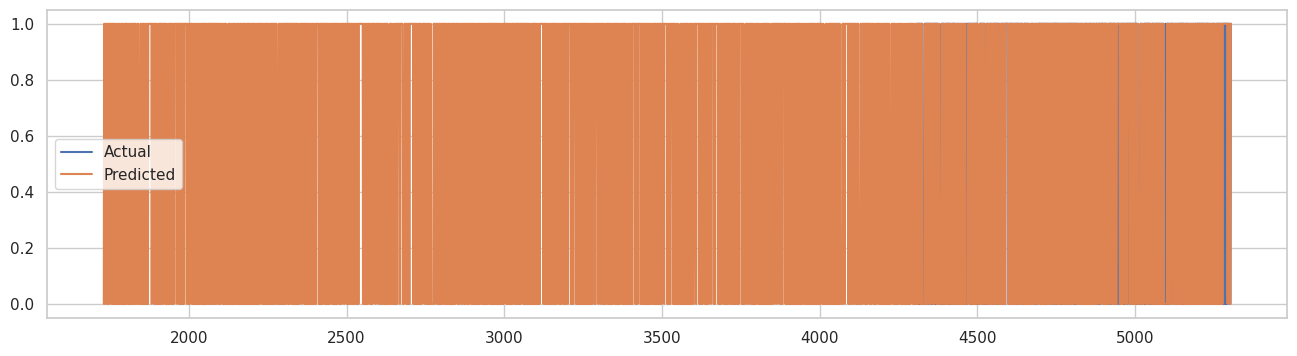

In [41]:
plt.figure(figsize=(16,4))
plt.plot(test["Target"], label="Actual")
plt.plot(predictions["Predictions"], label="Predicted")
plt.legend()
plt.show()


<AxesSubplot: >

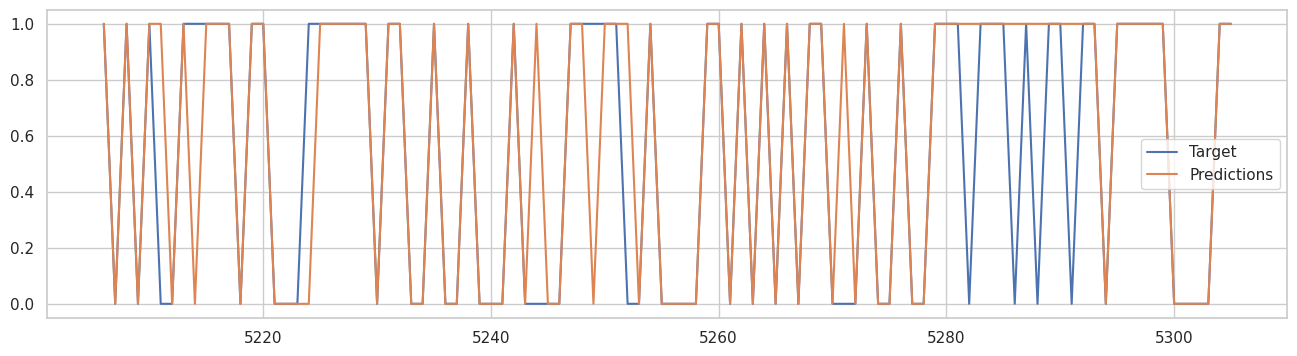

In [42]:
predictions.iloc[-100:].plot()